In [183]:
import numpy as np # linear algebra
import pandas as pd #DataFrame
import matplotlib.pyplot as plt #visualizaion

In [128]:
#File path which we want to merge
cab_path = "C:/Users/family/Desktop/Assignments/ALY 6040/Week2/Data set/uber&lyft/cab_ride.csv"
weather_path = "C:/Users/family/Desktop/Assignments/ALY 6040/Week2/Data set/uber&lyft/weather.csv"
nRowsToRead = 100 # For testing -- so code can be tested easily. Make it 0

In [174]:
#Importing CSV file a DataFrame
cab_pr = pd.read_csv(cab_path, delimiter=',',nrows = nRowsToRead)
weather = pd.read_csv(weather_path, delimiter=',',nrows = nRowsToRead)

In [175]:
cab_pr.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,5.0,1,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,11.0,1,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.540000e+12,North Station,HaymarketSquare,7.0,1,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,26.0,1,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,9.0,1,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [176]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [177]:
cab_pr['date_time'] = pd.to_datetime(cab_pr['time_stamp']/1000, unit='s')
weather['date_time'] = pd.to_datetime(weather['time_stamp'], unit='s')

In [142]:
cab_pr.head()

In [93]:
weather.head()

In [178]:
cab_pr['merge_date'] = cab_pr.source.astype(str) +" - "+ cab_pr.date_time.dt.date.astype("str") +" - "+ cab_pr.date_time.dt.hour.astype("str")
weather['merge_date'] = weather.location.astype(str) +" - "+ weather.date_time.dt.date.astype("str") +" - "+ weather.date_time.dt.hour.astype("str")

In [179]:
weather.index = weather['merge_date']
#cab_pr.index = cab_pr['merge_date']

In [180]:
merged_df = cab_pr.join(weather,on=['merge_date'],rsuffix ='_w') #to avoid confusion between indexing and column label, "_w" is added here

In [181]:
merged_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,date_time_w,merge_date_w
0,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,5.0,1,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,11.0,1,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,0.44,Lyft,1.540000e+12,North Station,HaymarketSquare,7.0,1,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,26.0,1,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,9.0,1,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [182]:
merged_df.to_csv("C:/Users/family/Desktop/Assignments/ALY 6040/Week2/Data set/uber&lyft/merged_df.csv")

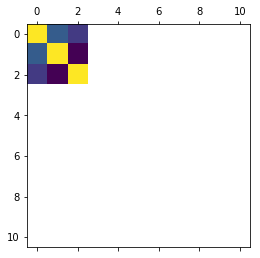

In [190]:
plt.matshow(merged_df.corr())
plt.show()
#Coorelation graph is complete because of NA values. These values can be transfered with mean value.

In [191]:
# rs = np.random.RandomState(0)
# df = pd.DataFrame(rs.rand(10, 10))
# corr = merged_df.corr()
# corr.style.background_gradient(cmap='coolwarm')